In [120]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [31]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def mean(list):
    return (np.sum(list))/(len(list))

def variance(list):
  return sum((list - mean(list))**2)/len(list)

def stddev(list):
  var = variance(list)
  return var**(1/2)


In [32]:
print('mean: ', my_mean(sales))
print('variance: ', variance(sales))
print('Standard Deviation: ', stddev(sales))

mean:  3052.714285714286
variance:  183761.06122448976
Standard Deviation:  428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [34]:
c_count = [127, 80, 105, 92, 120, 115, 93]

In [39]:
df = pd.DataFrame(data = [c_count, sales]).T
df.columns = ('Customer Count', 'Sales')

In [41]:
df.cov()

,Customer Count,Sales
Customer Count,290.952381,7604.357143
Sales,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [43]:
cdev = stddev(c_count)
sdev = stddev(sales)


In [82]:
sdev

428.67360686714756

In [79]:
denom = sdev*cdev

In [83]:
x = 7604.357143/denom

In [84]:
x * (6/7)

0.962833977832979

In [47]:
df.corr()

,Customer Count,Sales
Customer Count,1.000000,0.962834
Sales,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [101]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 16 columns):
Unnamed: 0          1310 non-null int64
pclass              1309 non-null float64
survived            1309 non-null float64
name                1309 non-null object
sex                 1309 non-null object
age                 1310 non-null float64
sibsp               1309 non-null float64
parch               1309 non-null float64
ticket              1309 non-null object
fare                1308 non-null float64
cabin               295 non-null object
embarked            1310 non-null object
boat                486 non-null object
body                121 non-null float64
home.dest           745 non-null object
has_cabin_number    1310 non-null int64
dtypes: float64(7), int64(2), object(7)
memory usage: 163.8+ KB
None


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [102]:
df = df.drop(columns = ['name','sex','ticket','cabin','embarked','body','boat','home.dest'])

In [105]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613


In [106]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

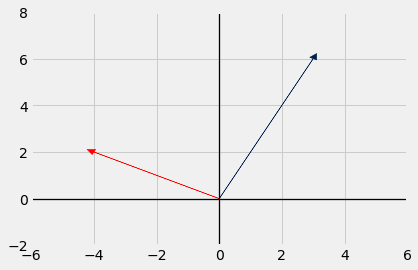

In [61]:
a = [3,
     6]
b = [-4,
     2]

plt.style.use('fivethirtyeight')

plt.axhline(y = 0, color = 'black', linewidth = 1.3)  
plt.axvline(x = 0, color = 'black', linewidth = 1.3)
                    
plt.xlim(-6,6)
plt.ylim(-2,8)

plt.arrow(0,0, b[0], b[1], head_width = .25, head_length = .25, color = 'red')
plt.arrow(0,0, a[0], a[1], head_width = .25, head_length = .25, color = '#011f4b')


plt.show();

In [63]:
#proof!
np.dot(a,b)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [64]:
a = [-5,3,7]
b = [6,-8,2]

np.dot(a,b)

-40

The **are not** orthogonal. If they were, the dot product would be 0. 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [65]:
c = [2,-15,20]

In [67]:
np.linalg.norm(c)**2

629.0000000000001

In [69]:
np.dot(c,c)

629

In [71]:
np.matmul(np.transpose(c), c)

629

It's 3 different ways of calculating the same thing. The norm of the Vector is the sum of its squares before a square root. In other words it is the sum of products of each value in the vector. The norm works with a single vector, where the dot product does the same thing, but for two vectors. It is the same in this case because we are getting the two vectors are the same. Matrix multiplication essentially does the same thing, but can also handle multiple vectors grouped together (thus making a matrix).

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\end{align}
\begin{align}
\end{align}
\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}
\begin{align}
\end{align}
<h4><center>and...</center></h4>
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
\end{align}
\begin{align}
\end{align}
\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}  - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [116]:
f = [4,12,11,9,2]
norm = np.linalg.norm(f)
u_vector = np.divide(norm, f)

In [117]:
u_vector

array([4.78278162, 1.59426054, 1.73919332, 2.12568072, 9.56556323])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

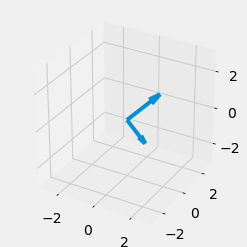

In [121]:
#linearly dependent (2 dimensional)

g = [1,0,-1]
h = [1,2**(1/2),1]

plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

ax.set_zlim(-3,3)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

ax.grid(True)
ax.quiver(0,0,0,g[0],g[1],g[2])
ax.quiver(0,0,0,h[0],h[1],h[2])
plt.show();

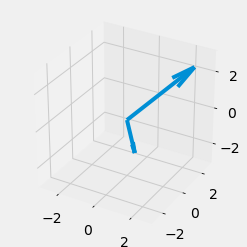

In [124]:
#Linearly independent

g = [1,-1,-1]
h = [2,3,2]

plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

ax.set_zlim(-3,3)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

ax.grid(True)
ax.quiver(0,0,0,g[0],g[1],g[2])
ax.quiver(0,0,0,h[0],h[1],h[2])
plt.show();

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

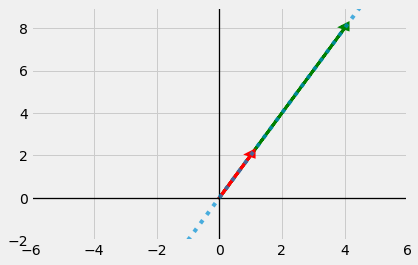

In [142]:
# The span for these two vectors is anything along this line: 

g = [1,2]
h = [4,8]
x = np.linspace(-10, 10, 100)
y = 2*x

plt.style.use('fivethirtyeight')

plt.axhline(y = 0, color = 'black', linewidth = 1.3)  
plt.axvline(x = 0, color = 'black', linewidth = 1.3)
                    
plt.xlim(-6,6)
plt.ylim(-2,9)


plt.arrow(0,0, h[0], h[1], head_width = .25, head_length = .25, linewidth = 3, color = 'green')
plt.arrow(0,0, g[0], g[1], head_width = .25, head_length = .25, linewidth = 3, color = 'red')
plt.plot(x,y, ':', alpha = 0.7)

plt.show();

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

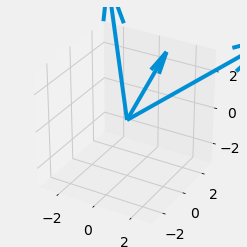

In [149]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

plt.style.use('fivethirtyeight')

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

ax.set_zlim(-3,3)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)

ax.grid(True)
ax.quiver(0,0,0,l[0],l[1],l[2])
ax.quiver(0,0,0,m[0],m[1],m[2])
ax.quiver(0,0,0,n[0],n[1],n[2])
plt.show();

They are all linearly independent so the span is the 3-Dimensional plane. 

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



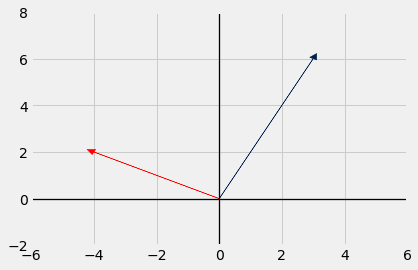

In [118]:
a = [3,
     6]
b = [-4,
     2]

plt.style.use('fivethirtyeight')

plt.axhline(y = 0, color = 'black', linewidth = 1.3)  
plt.axvline(x = 0, color = 'black', linewidth = 1.3)
                    
plt.xlim(-6,6)
plt.ylim(-2,8)

plt.arrow(0,0, b[0], b[1], head_width = .25, head_length = .25, color = 'red')
plt.arrow(0,0, a[0], a[1], head_width = .25, head_length = .25, color = '#011f4b')


plt.show();

## 6.2 What does it mean to form a basis?

The basis of a vector space is a set of Vectors that are linearly independent and thus can span the entire Vector Space (via scalars and other manipulations). 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

The rank of P is 3. None of these methods allow us to eliminate a row. 

>-All the elements are empty.  
-There are two equal rows.  
-A row is proportional to another.  
-A row is a linear combination of one or more.  

## 7.2 What does the rank of a matrix tell us?

The dimensionality of the matrix. Or in other words, the number of dimensions it is linearly independent. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

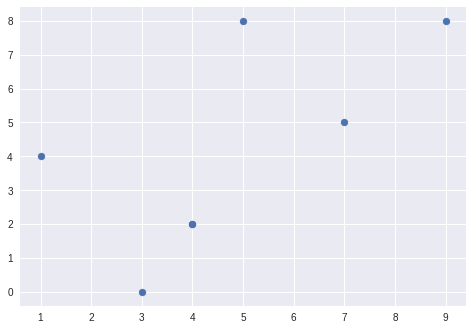

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()